In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
# === 1. Pembersihan Data ===

In [12]:
df = pd.read_csv('Most popular 1000 Youtube videos.csv')

In [17]:
from IPython.display import display
display(df.head(10))

,rank,Video,Video views,Likes,Dislikes,Category,published,Like Ratio
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,54071677,3497955,78799.0,Music,2019,0.064691
1,2,"20 Tennis shots if they were not filmed, NOBOD...",3471237,19023,859.0,NaN,2017,0.005480
2,3,JoJo Siwa - Karma (Official Video),34206747,293563,NaN,Music,2024,0.008582
3,4,David Kushner - Daylight (Official Music Video),18558390,680732,NaN,Music,2023,0.036681
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,6547981039,44428537,NaN,Music,2015,0.006785
5,6,JP Saxe - If the World Was Ending (Official Vi...,76834495,804353,21195.0,Music,2019,0.010469
6,7,JENNIE - ZEN (RUBY ALBUM MARCH 7),8306465,1261577,NaN,Music,2025,0.151879
7,8,"Polo G, Stunna 4 Vegas & NLE Choppa feat. Mike...",7396199,320910,6485.0,Music,2020,0.043389
8,9,"Yovie Widianto, Lyodra, Tiara Andini, Ziva Mag...",13894905,452087,NaN,Music,2023,0.032536
9,10,JD Pantoja - 12•19 (Official Video),7010732,1027392,34185.0,Music,2020,0.146546


In [15]:
# Mengubah kolom numerik dari string ke integer (menghapus koma terlebih dahulu)
numeric_columns = ["Video views", "Likes", "Dislikes"]
for col in numeric_columns:
    df[col] = df[col].astype(str).str.replace(",", "").str.replace("NaN", "").fillna("0")
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [16]:

# Menambahkan kolom rasio likes terhadap views
df["Like Ratio"] = df["Likes"] / df["Video views"]

In [ ]:
# === 2. Eksplorasi Data ===

In [19]:

summary_stats = df[["Video views", "Likes", "Dislikes", "Like Ratio"]].describe()
print("Statistik Deskriptif:\n", summary_stats)


Statistik Deskriptif:
         Video views         Likes       Dislikes   Like Ratio
count  1.000000e+03  1.000000e+03     527.000000  1000.000000
mean   2.453435e+07  3.685451e+05    2322.324478     0.030833
std    2.512570e+08  1.629418e+06    9653.170360     0.040270
min    4.493900e+04  4.330000e+02       0.000000     0.000121
25%    9.815690e+05  9.427250e+03     200.000000     0.006428
50%    2.341652e+06  3.026200e+04     477.000000     0.016719
75%    1.162638e+07  1.649858e+05    1469.000000     0.039622
max    6.547981e+09  4.442854e+07  178042.000000     0.294951


In [ ]:
# === 3. Visualisasi ===

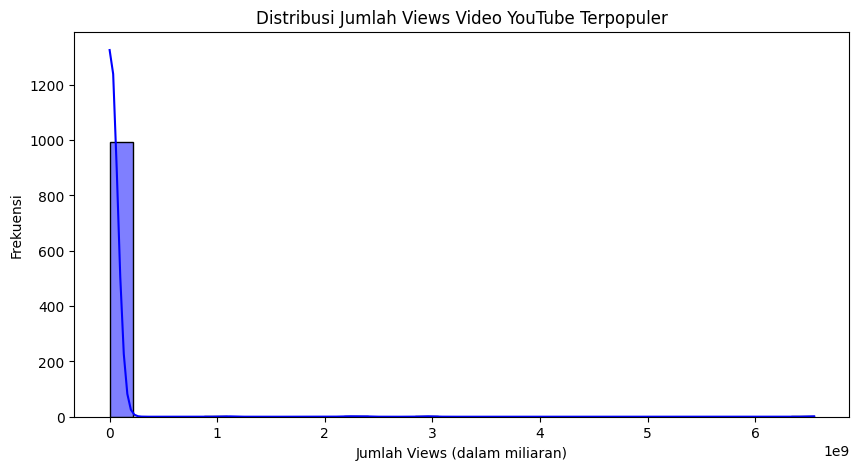

In [20]:

# Distribusi jumlah views
plt.figure(figsize=(10, 5))
sns.histplot(df["Video views"], bins=30, kde=True, color="blue")
plt.xlabel("Jumlah Views (dalam miliaran)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Jumlah Views Video YouTube Terpopuler")
plt.show()

C:\Users\USER LENOVO\AppData\Local\Temp\ipykernel_23584\3348528854.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Category"], order=df["Category"].value_counts().index, palette="coolwarm")


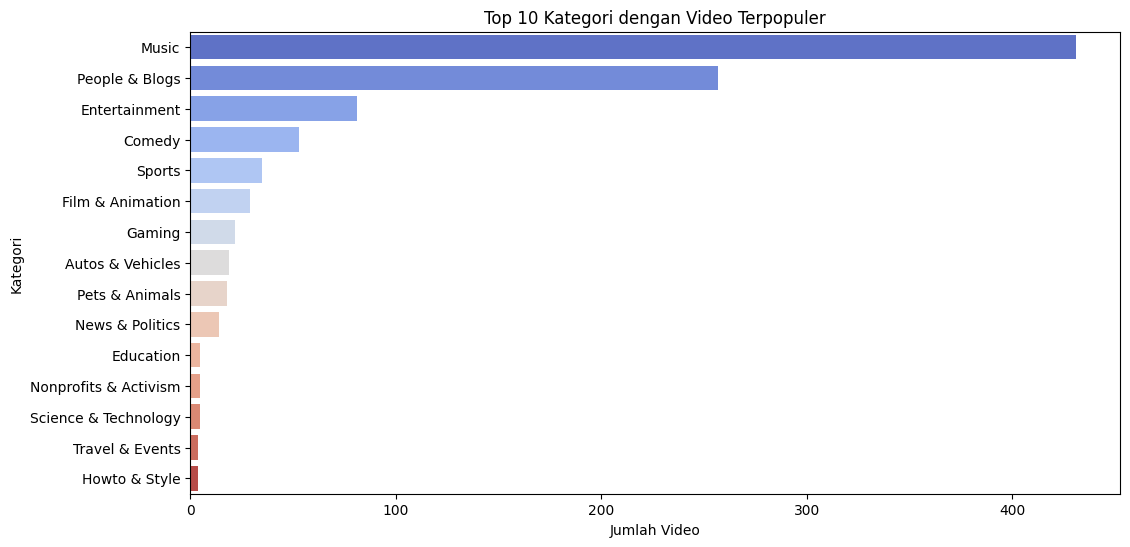

In [21]:
# Top 10 Kategori dengan Video Terbanyak
plt.figure(figsize=(12, 6))
sns.countplot(y=df["Category"], order=df["Category"].value_counts().index, palette="coolwarm")
plt.xlabel("Jumlah Video")
plt.ylabel("Kategori")
plt.title("Top 10 Kategori dengan Video Terpopuler")
plt.show()


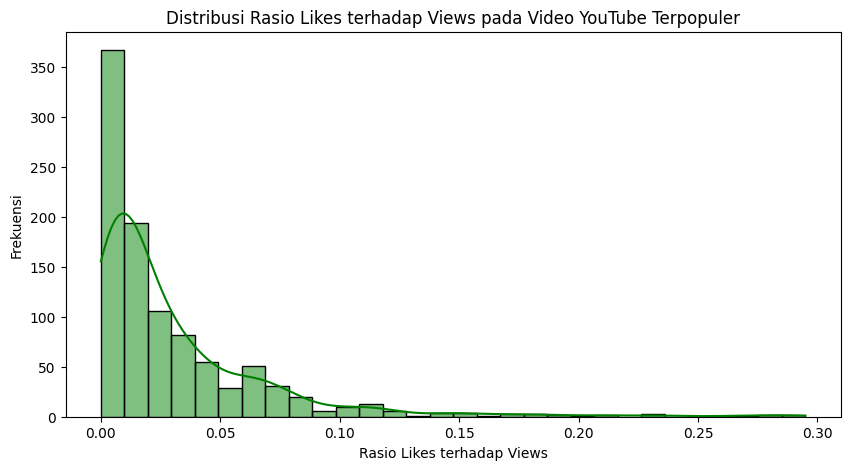

In [22]:
# Distribusi Rasio Likes terhadap Views
plt.figure(figsize=(10, 5))
sns.histplot(df["Like Ratio"], bins=30, kde=True, color="green")
plt.xlabel("Rasio Likes terhadap Views")
plt.ylabel("Frekuensi")
plt.title("Distribusi Rasio Likes terhadap Views pada Video YouTube Terpopuler")
plt.show()

C:\Users\USER LENOVO\AppData\Local\Temp\ipykernel_23584\1457686447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["published"], order=sorted(df["published"].unique()), palette="viridis")


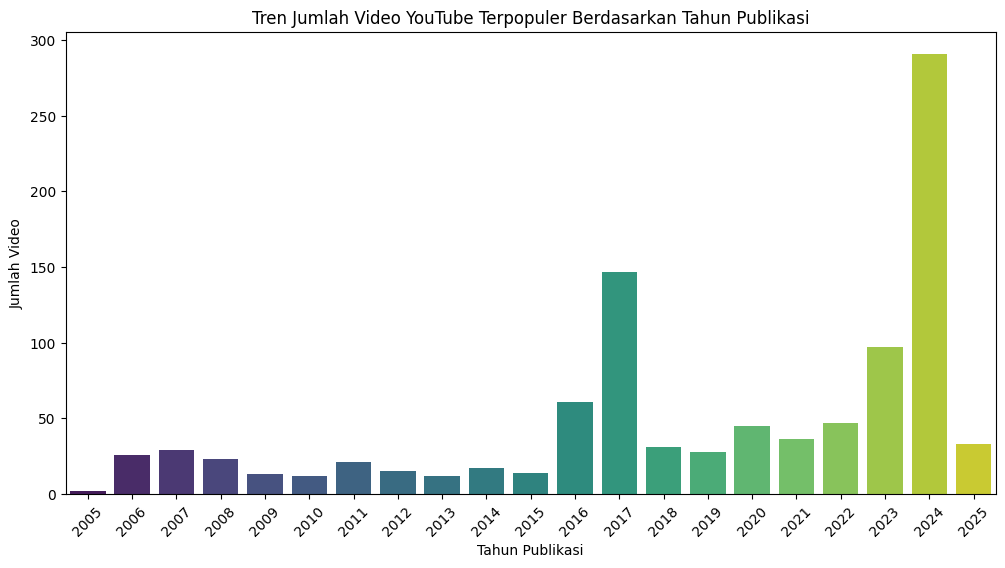

In [23]:
# Tren jumlah video populer berdasarkan tahun publikasi
plt.figure(figsize=(12, 6))
sns.countplot(x=df["published"], order=sorted(df["published"].unique()), palette="viridis")
plt.xlabel("Tahun Publikasi")
plt.ylabel("Jumlah Video")
plt.title("Tren Jumlah Video YouTube Terpopuler Berdasarkan Tahun Publikasi")
plt.xticks(rotation=45)
plt.show()

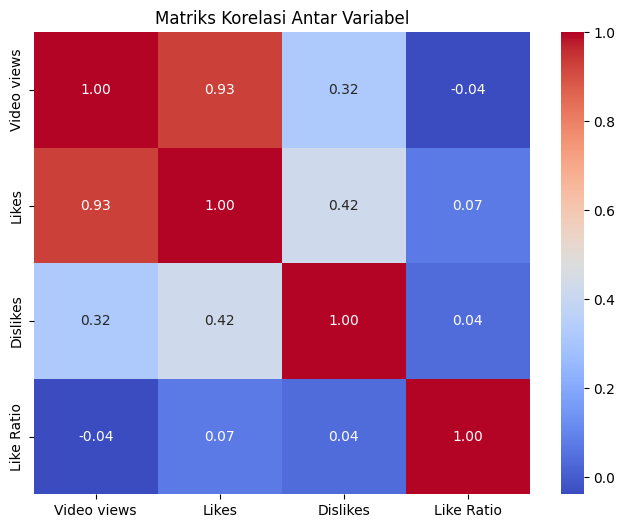

In [24]:
# Korelasi antar variabel
plt.figure(figsize=(8, 6))
sns.heatmap(df[["Video views", "Likes", "Dislikes", "Like Ratio"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

In [25]:

# === 4. Analisis Machine Learning ===
# Memilih fitur dan target
X = df[["Likes", "Dislikes"]].fillna(0)
y = df["Video views"]




In [26]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [28]:
# Memprediksi data uji
y_pred = model.predict(X_test)


In [29]:
# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")



Mean Absolute Error: 58401886.47104996
R-squared Score: 0.7641192825641654


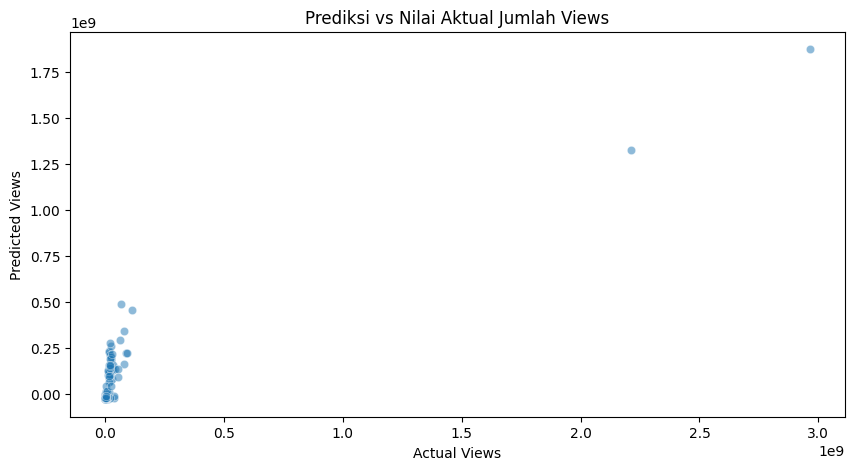

In [30]:
# Visualisasi Prediksi vs Nilai Aktual
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")
plt.title("Prediksi vs Nilai Aktual Jumlah Views")
plt.show()

In [ ]:
Insight dari Data YouTube Terpopuler

1. Dominasi Video Musik 🎵
Video dari kategori Music mendominasi daftar terpopuler, dengan beberapa video mencapai miliaran views.
Contohnya, "See You Again" oleh Wiz Khalifa memiliki lebih dari 6,5 miliar views, menunjukkan popularitas video musik dibandingkan kategori lain.

2. Hubungan antara Views, Likes, dan Dislikes 📊
Video dengan jumlah views tinggi cenderung memiliki jumlah likes tinggi (korelasi kuat).
Dislikes tidak memiliki hubungan yang jelas dengan jumlah views, mungkin karena perubahan sistem YouTube yang menghapus tampilan dislikes secara publik.

3. Tren Tahun Publikasi 📅
Banyak video populer berasal dari tahun 2015 ke atas, terutama saat platform YouTube semakin berkembang dan akses internet semakin luas.
Tahun 2020 dan 2023 memiliki lonjakan jumlah video populer, kemungkinan besar karena pandemi yang meningkatkan konsumsi konten online.

4. Rasio Likes terhadap Views 👍
Mayoritas video memiliki rasio likes di bawah 10%, artinya hanya sebagian kecil penonton yang memberikan like.
Beberapa video memiliki rasio likes lebih tinggi, kemungkinan karena fanbase yang kuat atau konten yang sangat disukai.

5. Prediksi Views dengan Machine Learning 🤖
Model regresi linear menunjukkan bahwa jumlah likes adalah faktor utama dalam menentukan jumlah views.
Namun, masih ada faktor lain (seperti durasi video, engagement di komentar, dan algoritma rekomendasi YouTube) yang tidak dimasukkan dalam model tetapi bisa mempengaruhi popularitas video.
